In [1]:
# recommendations for suitable months to release new content and top-rated 10 movies on Netflix based on the analysis of data.

In [2]:
# import libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# load dataset
df = pd.read_csv('netflix_titles.csv')

In [4]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## data understanding and preprocessing




In [5]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5945,s5946,Movie,In Defense of a Married Man,Joel Oliansky,"Judith Light, Michael Ontkean, Jerry Orbach, P...",United States,"October 1, 2011",1990,TV-14,94 min,Dramas,A lawyer's husband is having an affair. When h...
2718,s2719,TV Show,Community,NaN,"Ken Jeong, Jim Rash, Donald Glover, Joel McHal...",United States,"April 1, 2020",2015,TV-14,6 Seasons,TV Comedies,"When his degree is found bogus, lawyer Jeff Wi..."
1142,s1143,Movie,White Boy,Shawn Rech,Richard Wershe Jr.,United States,"April 1, 2021",2017,TV-MA,83 min,Documentaries,This true-crime documentary exposes new facts ...
8685,s8686,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,"June 19, 2019",2018,TV-MA,99 min,Dramas,A young man in foster care finds his voice in ...
3747,s3748,Movie,DJ Cinderella,Bruno Garotti,"Maísa Silva, Filipe Bragança, Fernanda Paes Le...",Brazil,"June 14, 2019",2019,TV-PG,95 min,"Children & Family Movies, Comedies",Fiercely independent and disillusioned with lo...


In [6]:
df.shape

(8807, 12)

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
#duplicated values
dup = df.duplicated().sum()

In [9]:
dup

0

In [10]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [11]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


<Axes: >

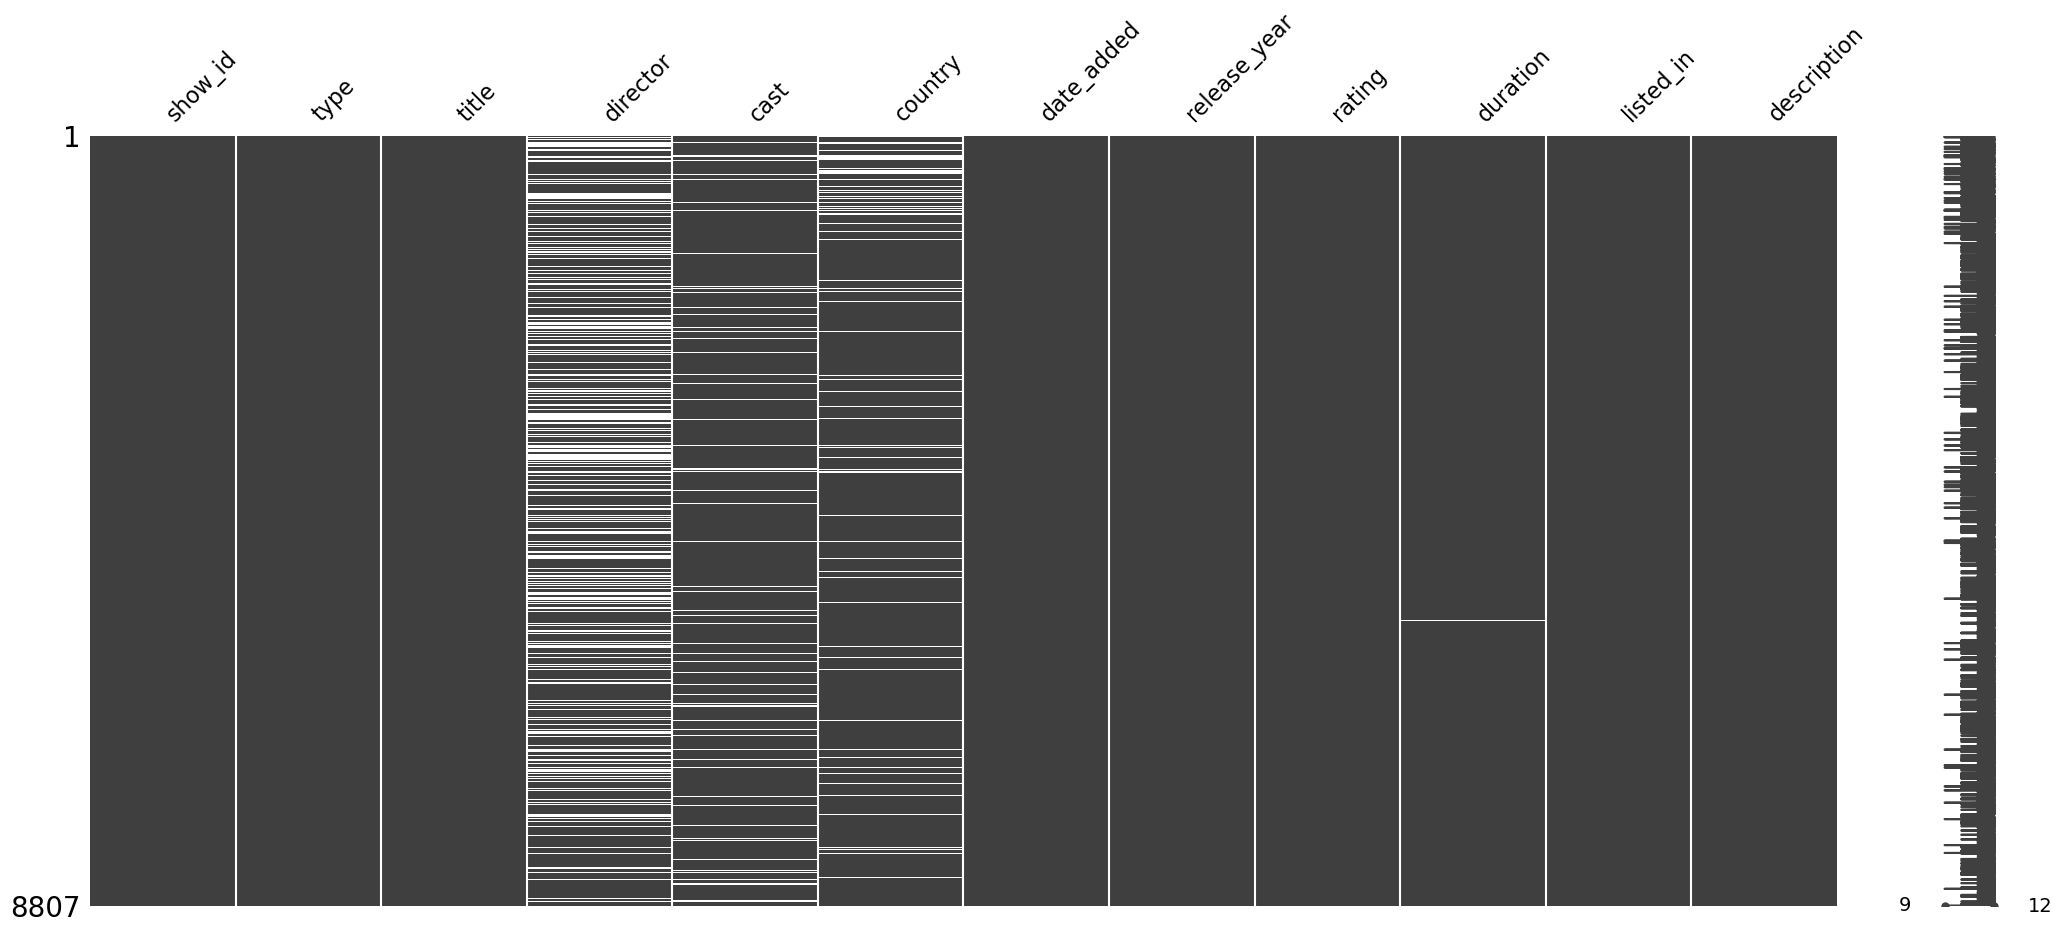

In [12]:
msno.matrix(df)

*  null values are present in director, cast, country, date_added,duration and rating; Since there are only few null values present in date_added, rating and duration we will remove them from the data.

In [13]:
# understanding the feature
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## data wrangling

In [14]:
# Let's make a copy of the dataset first, before we start any data wrangling: 
data = df.copy()

In [15]:
#fill null value
data['cast'] = data['cast'].fillna(value='Not available')

In [16]:
data['cast']

0                                           Not available
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                           Not available
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                        Not available
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [17]:
 data['country'] = data['country'] = data['country'].fillna(value='Not Known')

In [18]:
data['country']

0       United States
1        South Africa
2           Not Known
3           Not Known
4               India
            ...      
8802    United States
8803        Not Known
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [19]:
# Since date_added, rating, and duration have low number of missing values so dropping is not affected the dataset
data = data.dropna(subset=['date_added','rating','duration'])

In [20]:
#If removing samples is not feasible or would result in too much data loss, so put default Unknown values
data['director'] = data['director'].fillna(value='Unknown')

In [21]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# descriptive analysis and understand relation between  meta data like movies and tv shows

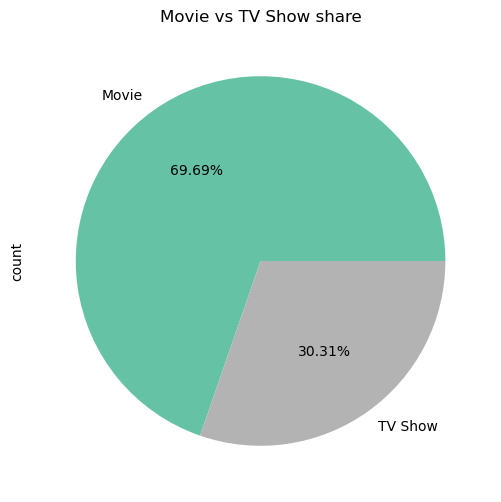

In [22]:
spread = data['type'].value_counts()
plt.rcParams['figure.figsize'] = (6,6)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set2')
plt.title(f'Movie vs TV Show share')
plt.show()
     

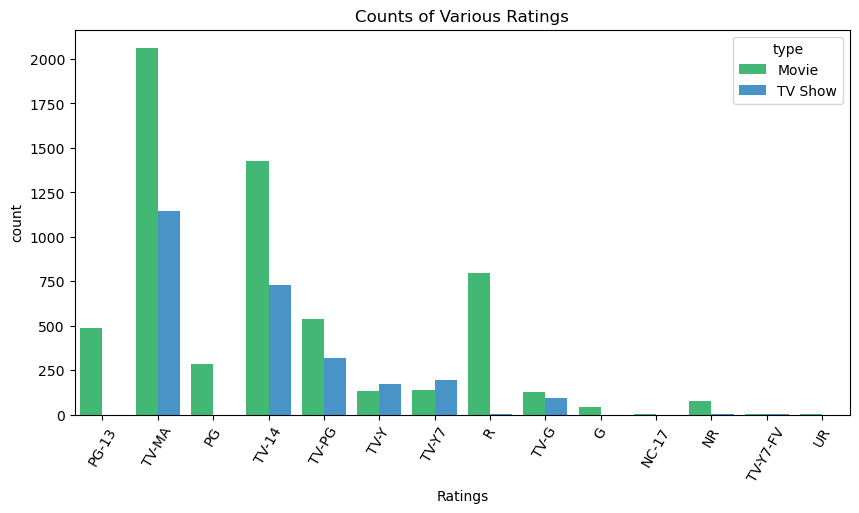

Each Rating Counts for Different Types of Shows:
rating    type   
G         Movie        41
NC-17     Movie         3
NR        Movie        75
          TV Show       4
PG        Movie       287
PG-13     Movie       490
R         Movie       797
          TV Show       2
TV-14     Movie      1427
          TV Show     730
TV-G      Movie       126
          TV Show      94
TV-MA     Movie      2062
          TV Show    1143
TV-PG     Movie       540
          TV Show     321
TV-Y      Movie       131
          TV Show     175
TV-Y7     Movie       139
          TV Show     194
TV-Y7-FV  Movie         5
          TV Show       1
UR        Movie         3
dtype: int64


In [23]:

plt.figure(figsize=(10, 5))
sns.countplot(x='rating', hue='type', data=data, palette=["#2ecc71", "#3498db"] )
plt.title('Counts of Various Ratings')
plt.xlabel('Ratings')
plt.xticks(rotation = 60)
plt.show()

# Printing The Counts of Each Rating for Different Type Shows
print('Each Rating Counts for Different Types of Shows:')
print(data.groupby(['rating', 'type']).size())

In [24]:
# import textwrap

# # Filter data to include only movies (not TV shows)
# data = data[data['type'] == 'Movie']

# # Sort the movies DataFrame by 'rating' column
# data = data[data['rating']=='TV-MA']
# top_10_titles = data['title'].head(10)

# # Create a horizontal bar chart with wrapped text
# plt.figure(figsize=(10, 6))
# plt.barh(range(len(top_10_titles)), 1, color='skyblue')  # Dummy width
# plt.yticks(range(len(top_10_titles)), top_10_titles.apply(lambda x: '\n'.join(textwrap.wrap(x, width=20))))  # Wrap text
# plt.xlabel('Movie Titles')
# plt.ylabel('Index')
# plt.title('Top 10 Movie Titles')
# plt.gca().invert_yaxis()  # Invert y-axis to have the top movie at the top
# plt.tight_layout()  # Adjust layout to prevent overlap
# plt.show()


In [25]:
pip install seaborn

From above count plot we can clearly see that the most of the ratings are given by TV-MA(2062) followed by TV-14(1427) and the least ratings are given by NC-17(3)
* TV-MA tops the charts, indicating that mature content is more popular on Netflix..
* Very few titles with a rating NC-17 exist. It can be understood since this type of content is purely for the audience above 17.

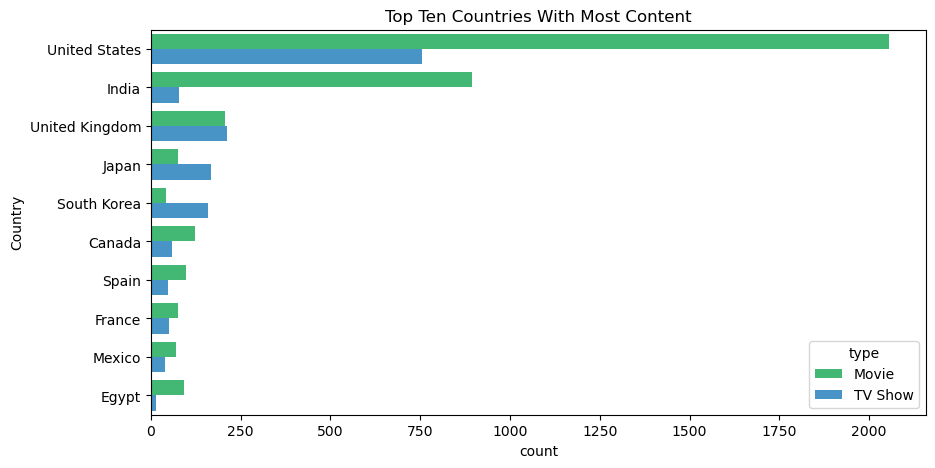

Number of Shows Produced by Top 10 Countries:
type     country       
Movie    United States     2055
         India              893
         United Kingdom     206
         Canada             122
         Spain               97
         Egypt               92
         Nigeria             86
         Indonesia           77
         Japan               76
         Turkey              76
TV Show  United States      754
         United Kingdom     212
         Japan              167
         South Korea        158
         India               79
         Taiwan              68
         Canada              59
         France              49
         Spain               48
         Australia           46
Name: count, dtype: int64


In [26]:
# top 10 countries with most like content
country_df = data[data['country'] != 'Not Known']
plt.figure(figsize=(10, 5))
sns.countplot(y='country', hue='type', data=country_df, palette=["#2ecc71", "#3498db"], order=country_df.country.value_counts().iloc[:10].index)
plt.title('Top Ten Countries With Most Content')
plt.ylabel('Country')
plt.show()
print('Number of Shows Produced by Top 10 Countries:')
print(country_df.groupby(['type']).country.value_counts().groupby(level=0, group_keys=False).head(10))

## From above count plot we found that the content belongs to United States alone is 2809 (Movie: 2055, TV Show: 754) and follwed by India

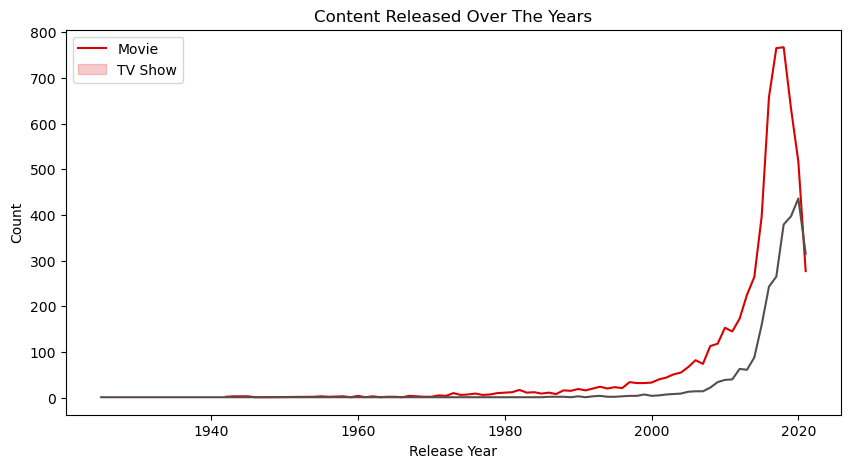

In [27]:
release_year_df = data[['type','release_year']]
movie_year = release_year_df[release_year_df['type']=='Movie'].release_year.value_counts().to_frame().reset_index()
show_year = release_year_df[release_year_df['type']=='TV Show'].release_year.value_counts().to_frame().reset_index()
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=movie_year, x='release_year', y='count', color = '#db0000')
sns.lineplot(data=show_year, x='release_year', y='count', color = '#564d4d')
plt.title('Content Released Over The Years')
plt.legend(['Movie','TV Show'])
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()



In [28]:
# Printing The Counts of Different Shows Released for Top 20 Years
print('Number of Shows Released in Each Year:')
print(data.groupby(['type']).release_year.value_counts().groupby(level=0, group_keys=False).head(20))

Number of Shows Released in Each Year:
type     release_year
Movie    2018            767
         2017            765
         2016            658
         2019            633
         2020            517
         2015            396
         2021            277
         2014            264
         2013            225
         2012            173
         2010            153
         2011            145
         2009            118
         2008            113
         2006             82
         2007             74
         2005             67
         2004             55
         2003             51
         2002             44
TV Show  2020            436
         2019            397
         2018            379
         2021            315
         2017            265
         2016            243
         2015            159
         2014             88
         2012             63
         2013             61
         2011             40
         2010             39
         20

from the above line graph, it is observed that most of the content on netflix are of the release date from 2010 to 2021.
* The highest number of movies got released in 2017 and 2018 and tv shows got released in 2019 and 2020.
* In 2021 the content of netflix are relase less than 2017 and 2018 due to the COVID-19 pandemic disrupted film production worldwide, leading to delays, cancellations, and increased costs for safety measures. This situation might have affected Netflix's ability to produce and release movies at the same pace as before.

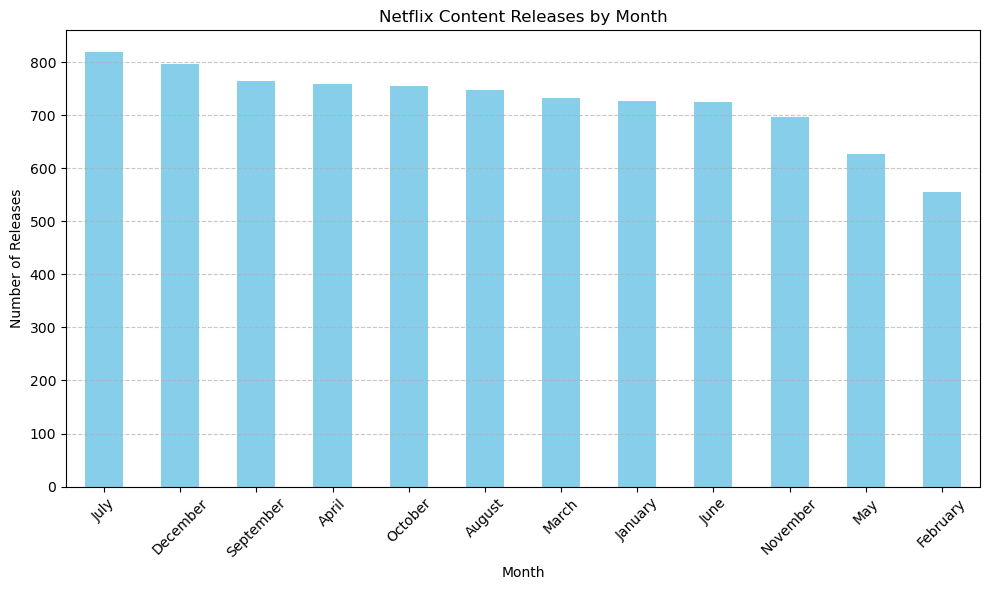

In [29]:
df['date_added'] = pd.to_datetime(data['date_added'],errors='coerce')

df['date_added'] = df['date_added'].dt.month_name()

# Group by month and count number of releases
monthly_counts = df['date_added'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Netflix Content Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

from above bar chart, it is observed that July and December are two suitable months to release new content. In many countries, July falls during the summer vacation period when schools are closed. This means that families are more likely to have free time and are looking for entertainment options, making it an attractive time for movie or tv shows. In December,It might be due to the winter, as in this month people may stay at home and watch tv shows and movies in their free time.

In [30]:
print(monthly_counts)

date_added
July         819
December     796
September    764
April        758
October      755
August       748
March        733
January      726
June         724
November     697
May          626
February     556
Name: count, dtype: int64


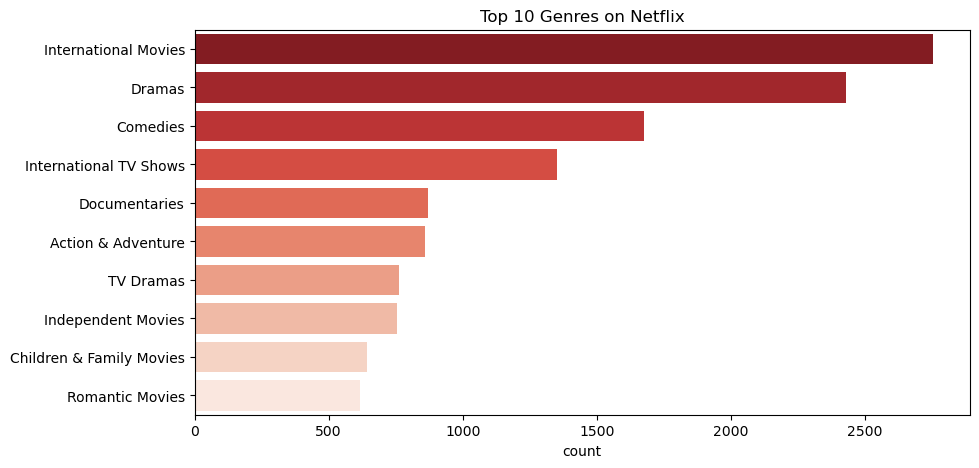

In [31]:
genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,5))
g = sns.countplot(y = genres, order=genres.value_counts().index[:10], palette = "Reds_r")
plt.title('Top 10 Genres on Netflix')

# Display Chart
plt.show()

From above bar chart, it is observed that international movies is in top in terms of genre and followed by dramas and comedies.

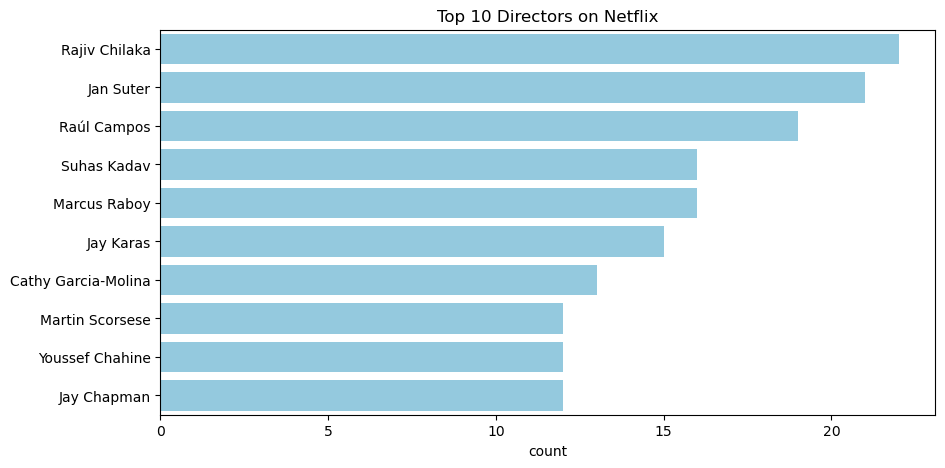

In [32]:
directors = data[data.director != 'Unknown'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(10,5))
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette=['skyblue'])
plt.title('Top 10 Directors on Netflix')
plt.show()

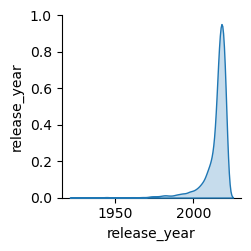

In [33]:
sns.pairplot(data, diag_kind="kde", kind = 'reg')
plt.show()

The associations between every pair of variables in a dataset may be shown using a pairplot, sometimes referred to as a scatterplot matrix. Because it makes it easy to see the relationships between all of the variables in a dataset, it is a great tool for data exploration.Since there is only one value in dataframe of integer type, we are unable to visualize the pair plot.

# Hypothesis testing

I've seen from the above chart experiments that some of the variables in our Netflix dataset don't seem to be regularly distributed. For this reason, I've opted to undertake statistical analysis under the supposition that our data is normally distributed.


Hypothetical Statement - 1

Average number of movies on Netflix in United States is greater than the average number of movies on Netflix in India.


### Hypotheses(using two sample t-test)

**Null Hypothesis (H0):** There is a no significant difference in average number of movies produced by the 'United States' and 'India'..

**Alternative Hypothesis (H1):** There is a significant difference in average number of movies produced by the 'United States' and 'India'.


In [34]:
us_movie_df = data[data.country == 'United States']
india_movie_df = data[data.country == 'India']
     

# Perform the two-sample t-test between the release years of the two groups of movies
import scipy
t_stat, p_val = scipy.stats.ttest_ind(us_movie_df['release_year'], india_movie_df['release_year'], equal_var=False)

# Print the results
if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in average number of movies produced by the 'United States' and 'India'.")

Since p-value (0.00023209694637581023) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.


two-sample t-test is appropriate for comparing the means of two independent samples, I chose it for this investigation. In this instance, we have two distinct sets of Netflix movie data for the US and India, and our goal is to find out if the average number of films in these two nations differs noticeably.

In [41]:

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['title'] + ' ' + data['cast'] + ' ' + data['listed_in']+' ' + data['director']+' ' + data['description'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
def recommend_movies(movie_title, top_n=10):
    idx = data[data['title'] == movie_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]
    return data.iloc[movie_indices].title
query_movie_title = 'Ganglands'
recommended_movies = recommend_movies(query_movie_title)
print(recommended_movies)




2668                      Earth and Blood
5480          Tracy Morgan: Staying Alive
4399                              Warrior
3976               The Eagle of El-Se'eed
5822                              Cocaine
5436                       My Little Baby
3789                       Killer Ratings
5488         All Hail King Julien: Exiled
697     Elite Short Stories: Carla Samuel
3552                      The Good Bandit
Name: title, dtype: object


In [36]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Known,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not available,Not Known,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Not available,Not Known,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [37]:
import pickle

In [40]:
data.to_pickle("movies.pkl")